# Exploratory Data Analysis, Preprocessing, and Feature Selection on Complex Dataset

The goal of this notebook is to visualize the dataset then prepare the dataset for machine learning.

What we know about the basic synthetic dataset already
 - 2M rows
 - 200 features | 70% noise, 30% useful | 120 continuous, 80 categorical
 - subjects were randomly assigned to treatment and control (not observational study)
 - 75% treatment rate
 - 3% response rate / base propensity 
 - partially linear relationship between x and y with interactions

## Package and data imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from itertools import compress
sns.set(style="white") # white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline 
sns.set()

In [2]:
filepath = '/nas/isg_prodops_work/stemr/2020/2020_03 - Capstone Project/'
complex_df = pd.read_pickle(filepath + 'opossum_sim_complex.pkl')

In [3]:
print(complex_df.shape)
complex_df.sample(10)

(2000000, 207)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,response_cont,exposed,true_lift,response_cont_prior,conversion,conversion_post,segments
748553,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,2.000,1.000,2.000,1.000,2.000,1.000,1.000,0.000,34.000,20.000,-0.061,-0.083,0.439,1.215,1.032,-0.149,-0.225,0.235,-0.821,-0.126,0.652,-1.225,0.265,-0.935,-1.612,1.017,-0.318,0.020,-0.622,0.148,0.102,-0.083,0.573,-0.136,-0.171,0.940,-1.159,-0.289,0.701,0.719,-0.469,-0.981,1.905,1.593,0.372,-0.637,-0.608,-0.206,-0.720,-0.577,0,0,1,1,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,396,572,671,822,364,33,997,102,94,653,311,704,41,145,931,713,674,636,658,809,798,185,147,25,129,282,325,246,505,279,946,789,187,662,5,961,833,789,514,744,67,474,253,967,4,522,786,936,581,9,47.090,42.976,48.360,46.862,17.883,29.671,79.413,25.535,32.250,91.899,31.377,78.167,57.154,56.854,71.608,80.425,5.033,14.437,51.552,6.015,78.297,55.177,79.348,32.862,67.836,56.950,25.388,37.214,92.926,73.365,9.705,1,0.825,8.880,0,0,lost_cause
431032,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,2.000,1.000,1.000,0.000,0.000,3.000,0.000,2.000,1.000,15.000,28.000,-0.907,-0.531,-0.249,0.468,0.054,0.153,1.079,0.105,0.614,-0.541,0.895,-1.174,0.213,0.520,0.701,0.229,0.380,1.303,-0.025,-0.494,0.799,0.577,0.284,-1.247,0.523,-1.367,0.869,-1.438,0.189,-0.422,-1.033,-0.584,0.692,-0.635,-0.305,0.427,-0.285,0.865,0.630,-0.692,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,220,241,564,528,661,302,534,204,165,338,467,537,343,785,647,802,299,214,728,121,138,827,835,284,535,472,677,358,924,117,407,170,135,410,441,469,976,283,238,706,956,196,692

In [4]:
complex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 207 entries, feature_0 to segments
dtypes: category(83), float64(73), int64(50), object(1)
memory usage: 2.0+ GB


In [5]:
complex_df.describe()

,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,response_cont,true_lift,response_cont_prior
count,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000,2000000.000
mean,0.001,-0.001,0.000,0.000,0.000,-0.000,0.001,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.001,-0.000,0.000,0.001,-0.000,0.000,0.000,-0.001,0.000,0.000,0.001,0.000,0.000,-0.001,0.000,0.000,-0.000,0.001,-0.000,0.000,0.001,0.000,-0.001,0.000,0.000,-0.000,-0.000,499.157,499.180,499.357,499.598,499.562,499.654,499.614,499.118,499.372,499.628,499.390,499.230,499.143,499.457,499.413,499.502,499.417,499.011,499.412,499.663,499.386,499.416,499.196,499.425,499.651,499.337,499.365,499.381,499.242,499.475,499.094,499.199,499.329,499.524,499.763,499.457,499.173,499.527,499.674,499.522,499.654,499.483,499.270,499.111,499.215,499.483,499.742,499.363,499.592,499.625,50.015,49.998,49.984,49.986,50.001,50.008,50.002,49.988,50.015,50.013,49.985,50.014,49.951,49.953,50.023,49.992,49.994,50.012,50.025,50.005,49.969,50.009,50.029,50.014,50.035,50.019,50.003,50.012,49.998,50.028,9.139,0.753,8.386
std,0.797,0.750,0.752,0.725,0.732,0.748,0.758,0.822,0.807,0.741,0.692,0.697,0.713,0.685,0.799,0.741,0.782,0.649,0.698,0.720,0.747,0.717,0.777,0.764,0.776,0.741,0.763,0.767,0.772,0.721,

In [6]:
complex_df[complex_df['segments']=='persuadable']['feature_199'].value_counts()

65.105    1
25.788    1
77.613    1
75.488    1
10.883    1
         ..
58.506    1
89.832    1
20.616    1
43.515    1
24.841    1
Name: feature_199, Length: 119566, dtype: int64

## Curse of Dimensionality 

Going to be tough to visualize 250 features in EDA so going to start with one-hot encoding and feature selection.

We are kind of cheating in that we know 70% of the original variables are probably noise and in the real world we won't have that intel.

The most important part of this step will be to see if we can throw out useless features.

In [7]:
complex_df1 = complex_df

In [8]:
ohe = OneHotEncoder()
columns = list(complex_df1.columns[8:20])
columntransformer = ColumnTransformer([('encoder',ohe, columns)],remainder='passthrough',n_jobs=10)
complex_array = columntransformer.fit_transform(complex_df1)

In [9]:
complex_df1 = pd.DataFrame(complex_array)
complex_df1 = complex_df1.infer_objects()

In [10]:
complex_df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328
0,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,-1.578,-0.793,0.197,-0.046,0.961,0.066,-0.328,-0.332,0.120,-1.446,-0.754,0.416,-0.028,1.867,-0.071,-0.190,0.900,0.008,2.082,-1.132,-0.173,-0.312,-0.023,0.001,-0.521,-0.400,0.249,-0.120,-1.586,-0.686,-0.164,-0.554,-0.227,1.011,-0.535,0.619,-0.046,0.507,0.552,1.020,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,634,733,749,30,607,40,522,123,857,6,42,969,830,850,141,514,150,88,106,200,872,784,82,717,877,917,995,660,871,385,804,309,82,533,709,474,214,272,878,877,427,509,134,250,458,754,51,150,995,689,69.397,15.223,92.989,6.882,8.801,16.197,99.116,86.913,41.349,44.233,78.018,93.989,49.470,58.747,45.558,39.693,88.362,59.972,47.663,14.132,46.089,28.786,96.661,25.227,0.119,43.170,87.563,52.494,87.618,79.344,6.228,1,0.517,5.710,0,0,lost_cause
1,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.436,0.949,-0.843,-0.291,-0.116,0.379,0.896,-2.017,0.925,-0.496,0.698,0.007,-0.355,-0.060,0.328,-0.291,0.680,0.603,-0.513,0.054,0.370,0.235,0.618,-0.259,0.361,-1.042,-0.358,-0.090,0.143,0.055,-0.849,-0.605,1.622,-0.621,-0.480,-0.285,0.227,0.535,0.586,0.373,1,1,0,1,1,

In [11]:
x = 0
name_list = []
while x <= 321:
    y = 'feature_' + str(x)
    name_list.append(y)
    x = x + 1

In [12]:
complex_df1.columns = name_list + ['response_cont','exposed','true_lift','response_cont_prior','conversion','conversion_post','segments']

In [13]:
complex_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 329 entries, feature_0 to segments
dtypes: float64(215), int64(113), object(1)
memory usage: 4.9+ GB


In [14]:
complex_df1.iloc[:,0:142] = complex_df1.iloc[:,0:142].astype('category')
complex_df1.iloc[:,182:242] = complex_df1.iloc[:,182:242].astype('category')
complex_df1['exposed'] = complex_df1['exposed'].astype('category')
complex_df1['conversion'] = complex_df1['conversion'].astype('category')
complex_df1['conversion_post'] = complex_df1['conversion_post'].astype('category')
complex_df1['segments'] = complex_df1['segments'].astype('category')

In [15]:
complex_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 329 entries, feature_0 to segments
dtypes: category(206), float64(73), int64(50)
memory usage: 2.2 GB


In [16]:
complex_df1.to_pickle(filepath+'complex_df_kitchensink.pkl')

In [17]:
complex_df1.head(100)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,response_cont,exposed,true_lift,response_cont_prior,conversion,conversion_post,segments
0,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000

### Univariate Logistic CV AUC Importance

In [18]:
feature_names = list(complex_df1.columns[0:322])
target_name = 'conversion_post'

In [19]:
complex_df_samp = complex_df1.sample(50000, random_state=847)

In [20]:
result_dict = {}
for i in feature_names:
    x = complex_df_samp[[i]]
    y = complex_df_samp[target_name]
    log_model = LogisticRegression()
    result_dict['{}'.format(i)] = np.mean(cross_val_score(log_model, x, y, cv=3, scoring='roc_auc'))
result_frame = pd.DataFrame.from_dict(result_dict, orient='index', columns=['cv_score'])
result_frame.sort_values(by='cv_score', ascending = False)

,cv_score
feature_172,0.655
feature_181,0.648
feature_176,0.641
feature_166,0.625
feature_168,0.622
...,...
feature_248,0.491
feature_175,0.490
feature_294,0.490
feature_226,0.488


In [21]:
result_frame.sort_values(by='cv_score', ascending = False).to_csv(filepath + 'univ_log_scores.csv', index=True)

In [22]:
result_frame = pd.read_csv(filepath + 'univ_log_scores.csv')
result_frame = result_frame.rename(columns={'Unnamed: 0':'feature'})
result_frame.head(100)

,feature,cv_score
0,feature_172,0.655
1,feature_181,0.648
2,feature_176,0.641
3,feature_166,0.625
4,feature_168,0.622
...,...,...
95,feature_26,0.509
96,feature_98,0.509
97,feature_25,0.509
98,feature_269,0.508


In [23]:
top_100 = result_frame.iloc[0:100,:]
#490-390
middle_100 = result_frame.iloc[111:211,:]
bottom_100 = result_frame.iloc[222:322,:]
random_100 = result_frame.sample(100)

top_100['nrank'] = 'top100'
middle_100['nrank'] = 'middle 100'
bottom_100['nrank'] = 'bottom 100'
random_100['nrank'] = 'random 100'

frames = [top_100, middle_100, bottom_100, random_100]

viz_frame = pd.concat(frames)

/home/stemr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/stemr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/stemr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [24]:
viz_frame

,feature,cv_score,nrank
0,feature_172,0.655,top100
1,feature_181,0.648,top100
2,feature_176,0.641,top100
3,feature_166,0.625,top100
4,feature_168,0.622,top100
...,...,...,...
96,feature_98,0.509,random 100
158,feature_23,0.504,random 100
75,feature_17,0.511,random 100
97,feature_25,0.509,random 100


/home/stemr/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


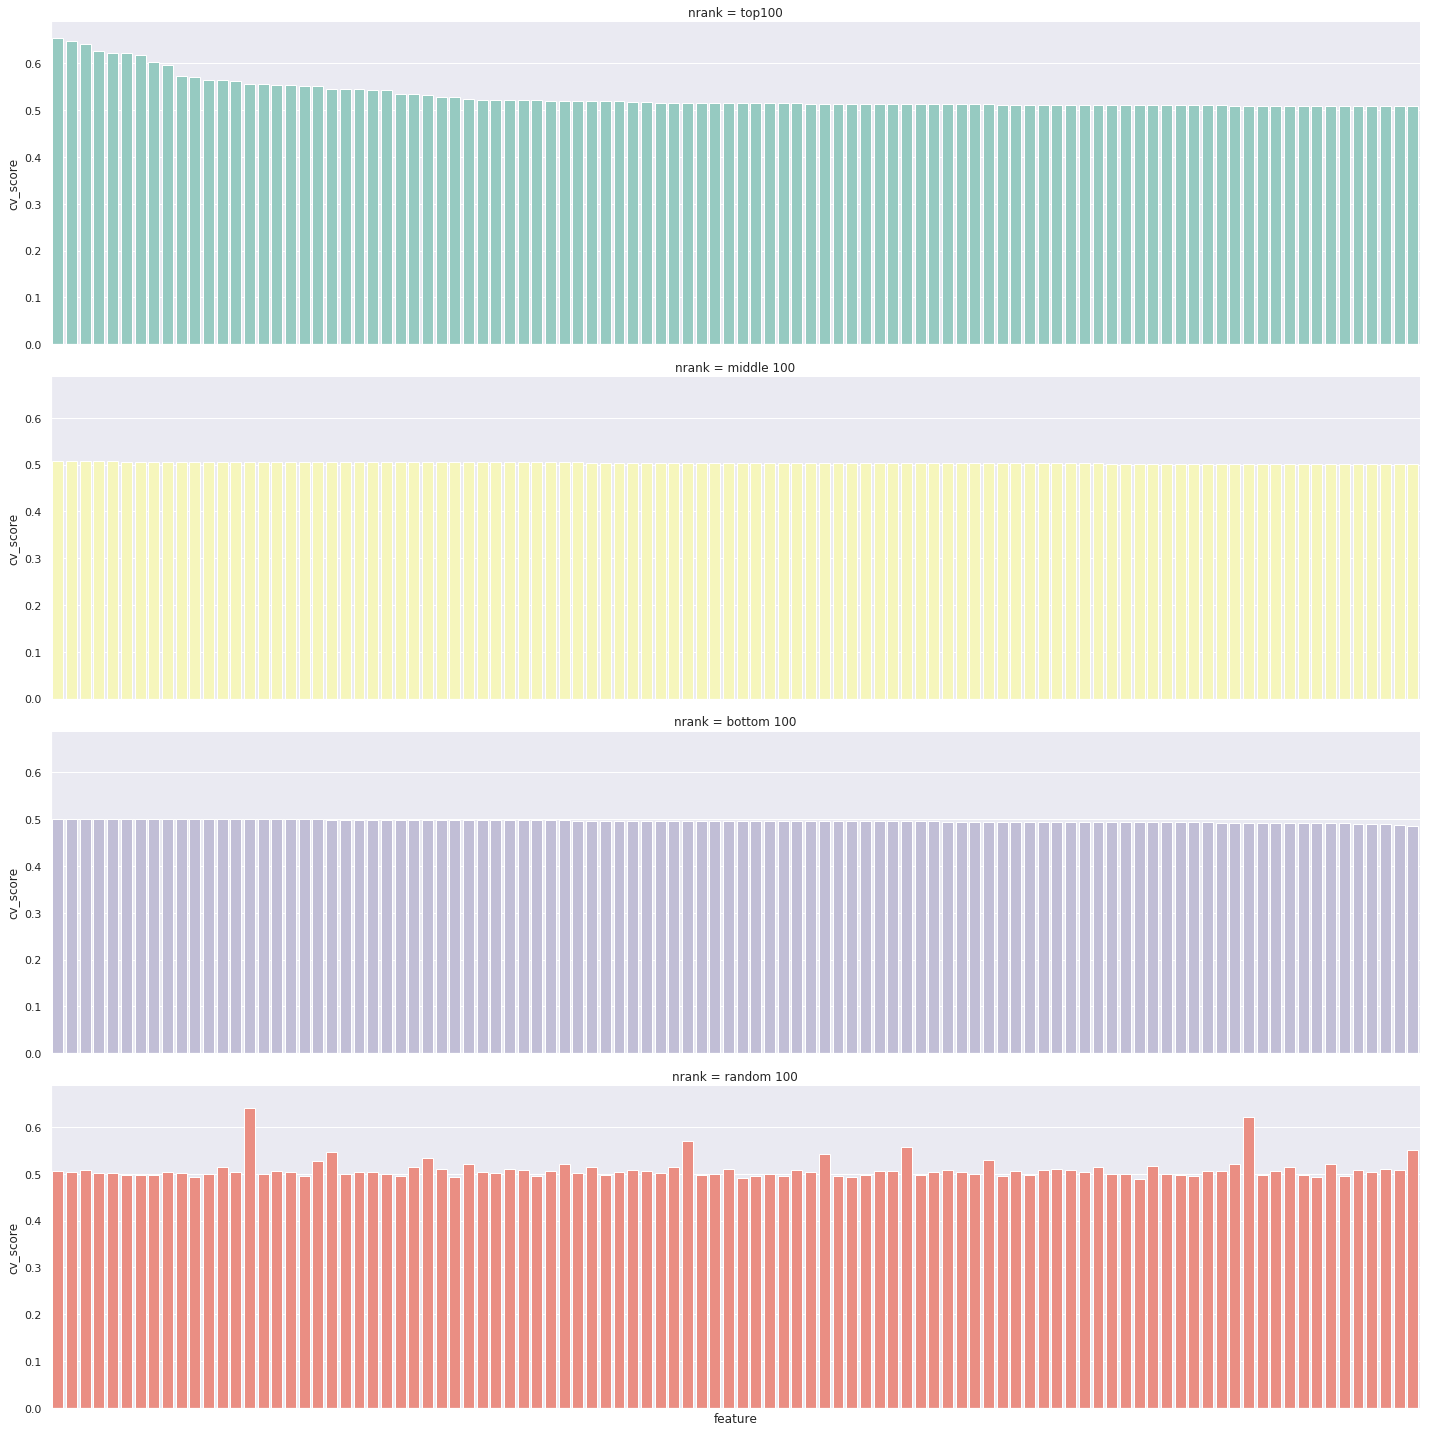

In [25]:
nranks = viz_frame['nrank'].unique()
g = sns.FacetGrid(viz_frame, row="nrank", hue="nrank",
                  palette="Set3", height=5, aspect=4)
g.map(sns.barplot, 'feature', 'cv_score');

g.set(xticks=[])
plt.tight_layout()
plt.show()

This might have been a good approach because if we drop features at .50 or below we get about 20% of the features left. Just to double check we will also look at undersample class balanced random forest.

In [26]:
feature_names = list(complex_df1.columns[0:322])
target_name = 'conversion_post'

In [27]:
## Test Train Split
x = complex_df1[feature_names]
y = complex_df1[target_name]

x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(x, y, test_size=0.2)

In [28]:
#Undersample for class balance
rm = RandomUnderSampler(random_state=847,sampling_strategy=1)
x_train_t_rm, y_train_t_rm = rm.fit_sample(x_train_t, y_train_t)
x_train_t_rm = pd.DataFrame(x_train_t_rm, columns=feature_names)
y_train_t_rm = pd.Series(y_train_t_rm)

In [29]:
model = RandomForestClassifier(n_estimators=300, max_depth=25, max_features=20)
model.fit(x_train_t_rm,y_train_t_rm)
importances = model.feature_importances_

In [30]:
importance_df = pd.DataFrame(model.feature_importances_,
                                   index = x_train_t_rm.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [31]:
importance_df

,importance
feature_172,0.046
feature_181,0.033
feature_144,0.031
feature_150,0.030
feature_176,0.030
...,...
feature_35,0.000
feature_34,0.000
feature_83,0.000
feature_132,0.000


In [32]:
importance_df = importance_df.reset_index()
importance_df = importance_df.rename(columns={'index':'feature'})

In [33]:
top_100 = importance_df.iloc[0:100,:]
middle_100 = importance_df.iloc[111:211,:]
bottom_100 = importance_df.iloc[222:322,:]
random_100 = importance_df.sample(100)

top_100['nrank'] = 'top100'
middle_100['nrank'] = 'middle 100'
bottom_100['nrank'] = 'bottom 100'
random_100['nrank'] = 'random 100'

frames = [top_100, middle_100, bottom_100, random_100]

viz_frame = pd.concat(frames)

/home/stemr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/stemr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/stemr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

/home/stemr/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


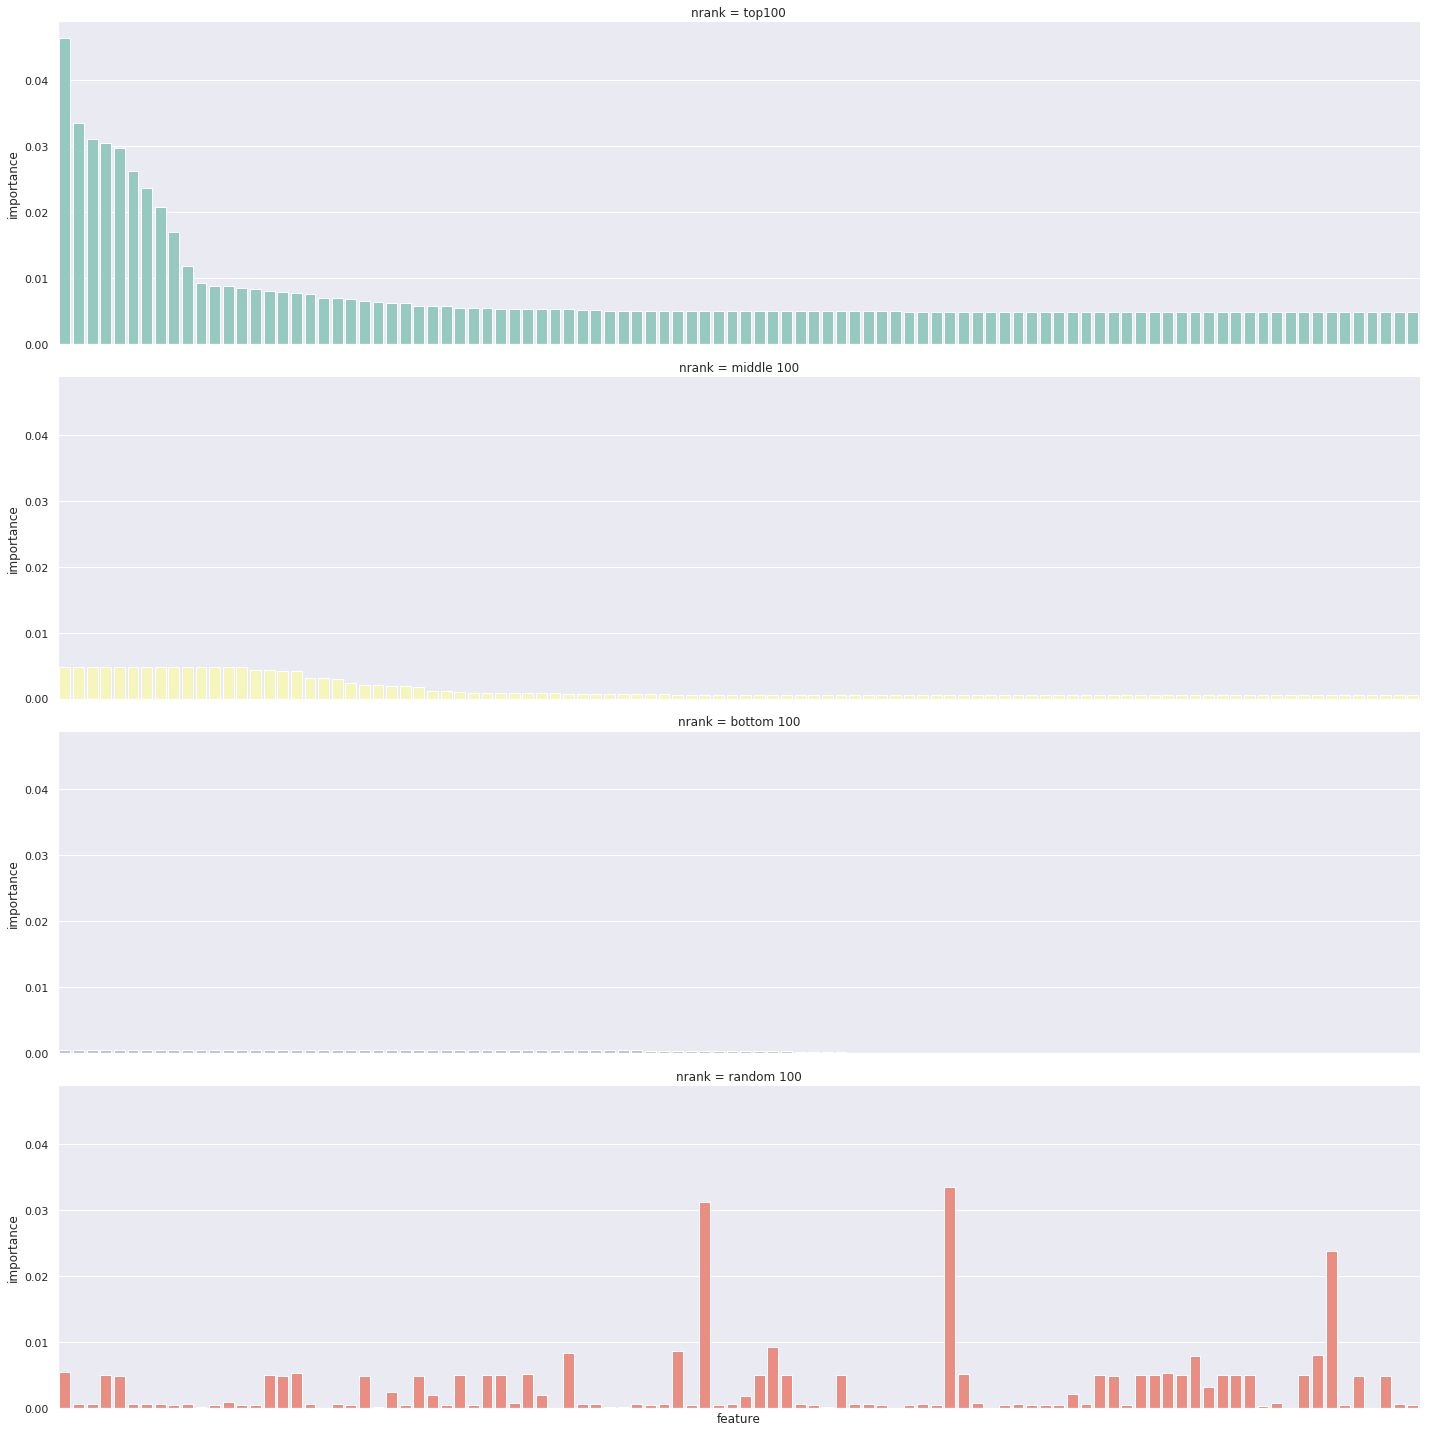

In [34]:
nranks = viz_frame['nrank'].unique()
g = sns.FacetGrid(viz_frame, row="nrank", hue="nrank",
                  palette="Set3", height=5, aspect=4)
g.map(sns.barplot, 'feature', 'importance');

g.set(xticks=[])
plt.tight_layout()
plt.show()

Based on these two tests and also knowing the data is 70% noise we can save tons of processing time by throwing out useless features. 

In [35]:
result_frame_filtered = result_frame[result_frame['cv_score'] >= .5]
imporance_df_filtered = importance_df.iloc[0:200]
feature_df = pd.merge(result_frame_filtered, imporance_df_filtered, left_on='feature',right_on='feature', how='inner')
feature_df.to_csv(filepath + 'complex_df_feat_names.csv', index=False)

In [36]:
feature_df

,feature,cv_score,importance
0,feature_172,0.655,0.046
1,feature_181,0.648,0.033
2,feature_176,0.641,0.030
3,feature_166,0.625,0.026
4,feature_168,0.622,0.021
...,...,...,...
144,feature_245,0.502,0.005
145,feature_321,0.502,0.005
146,feature_283,0.502,0.005
147,feature_288,0.502,0.005
